## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('haberman.csv')
df.columns=['age', 'op_year', 'axil_nodes', 'surv_status']
df.head()

,age,op_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
df.describe()

,age,op_year,axil_nodes,surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
df.shape

(305, 4)

In [5]:
df.isnull().sum()

age            0
op_year        0
axil_nodes     0
surv_status    0
dtype: int64

In [13]:
df.iloc[:, -1].value_counts() #To find out the unique survival counts

1    224
2     81
Name: surv_status, dtype: int64

In [22]:
df['surv_status'] = df['surv_status'].map({1:"yes", 2:"no"})
df['surv_status'] = df['surv_status'].astype('category')
print(df.head())

   age  op_year  axil_nodes surv_status
0   30       62           3         yes
1   30       65           0         yes
2   31       59           2         yes
3   31       65           4         yes
4   33       58          10         yes


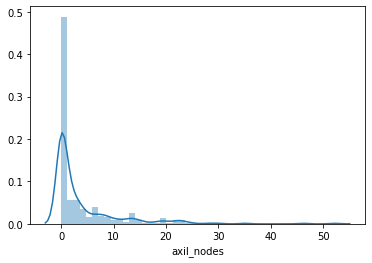

In [18]:
sns.distplot(df.axil_nodes)

### PDF (Probability Distribution Function)

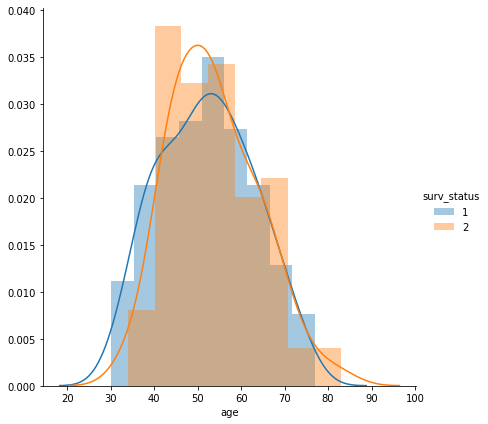

In [10]:
#PDF of age with hue survival status
sns.FacetGrid(df, hue='surv_status', height=6).map(sns.distplot, 'age').add_legend()
# We used to use size for size of the map but seaborn has rolled out a new variable called height.

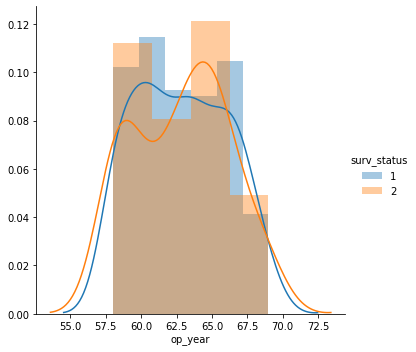

In [9]:
#PDF of operation year 
sns.FacetGrid(df, hue="surv_status", height=5).map(sns.distplot, 'op_year').add_legend()

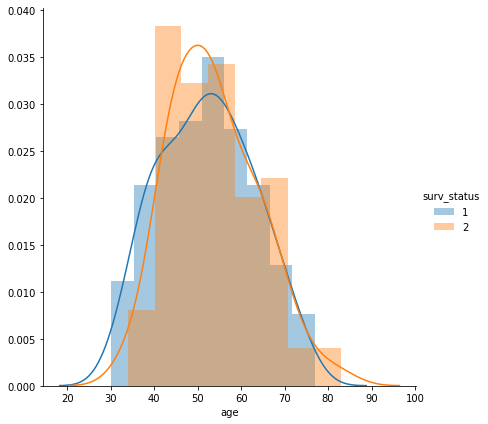

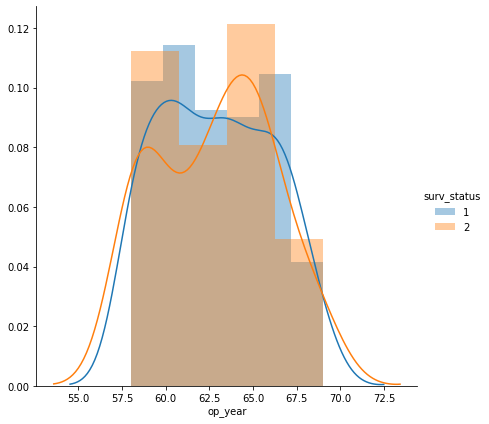

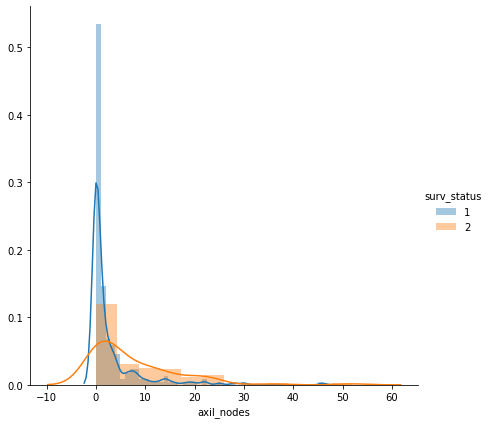

In [11]:
# a simple function for all the graphs at one place
for features in (list(((df.columns)[:-1]))):
    sns.FacetGrid(df, hue='surv_status', height=6).map(sns.distplot, features).add_legend()

## CDF

In [12]:
counts, bin_edges = np.histogram(df['axil_nodes'], bins=10, density=True)

In [13]:
pdf=counts/sum(counts)

In [14]:
cdf = np.cumsum(pdf)

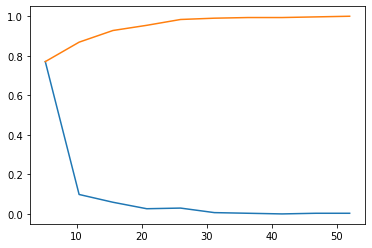

In [15]:
# Comparison of pdf and cdf
plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)

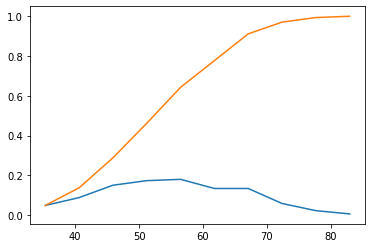

In [20]:
#cdf of age
count1, bin_edges1 = np.histogram(df['age'], bins=10, density=True)
pdf = count1/sum(count1)
cdf = np.cumsum(pdf)
plt.plot(bin_edges1[1:], pdf, bin_edges1[1:], cdf)
plt.show()

In [41]:
pdf

array([0.7704918 , 0.09836066, 0.05901639, 0.02622951, 0.0295082 ,
       0.00655738, 0.00327869, 0.        , 0.00327869, 0.00327869])

In [42]:
cdf

array([0.7704918 , 0.86885246, 0.92786885, 0.95409836, 0.98360656,
       0.99016393, 0.99344262, 0.99344262, 0.99672131, 1.        ])

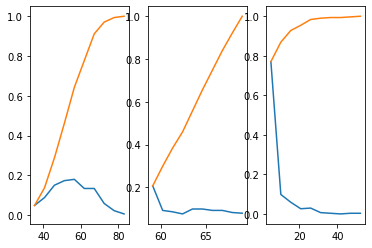

In [18]:
# Funciton to plot all the cdfs in one figure
plt.figure()
for idx, feature in enumerate(list((df.columns)[:-1])):
    plt.subplot(1,3, idx+1)
    count, bin_edges = np.histogram(df[feature], bins=10, density=True)
    pdf = count/sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)

## Box Plots

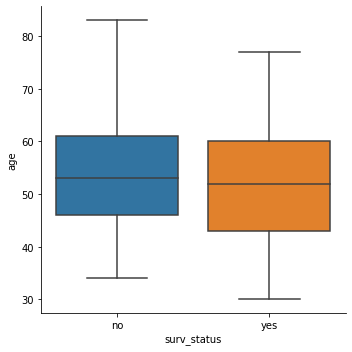

In [23]:
sns.catplot(x='surv_status', y='age', data=df, kind='box')

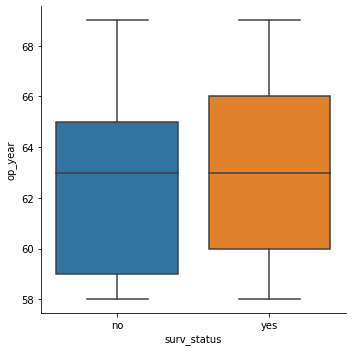

In [24]:
sns.catplot(x='surv_status', y='op_year', data=df, kind='box')

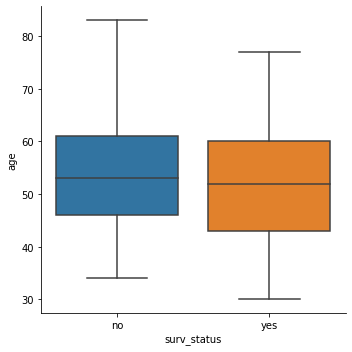

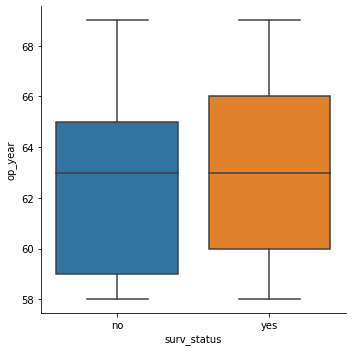

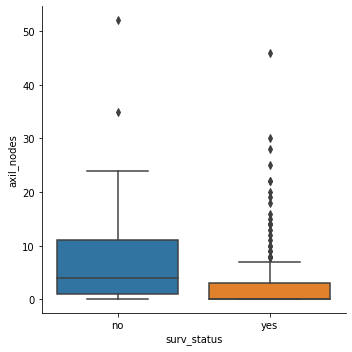

In [26]:
# function for plotting every column
for feature in list((df.columns)[:-1]):
    sns.catplot(x='surv_status', y=feature, data=df, kind='box')

## Violin Plot

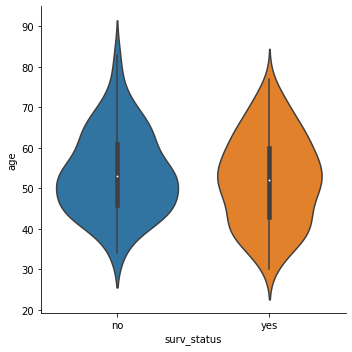

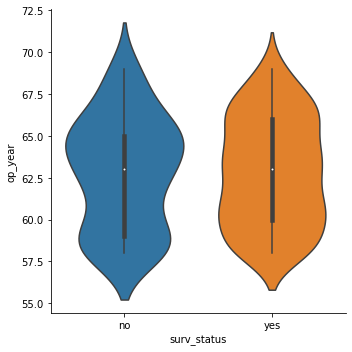

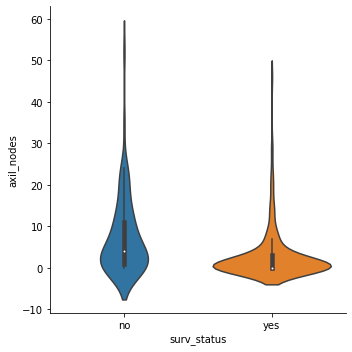

In [27]:
# function for plotting every column
for feature in list((df.columns)[:-1]):
    sns.catplot(x='surv_status', y=feature, data=df, kind='violin')

## Bivariate analysis

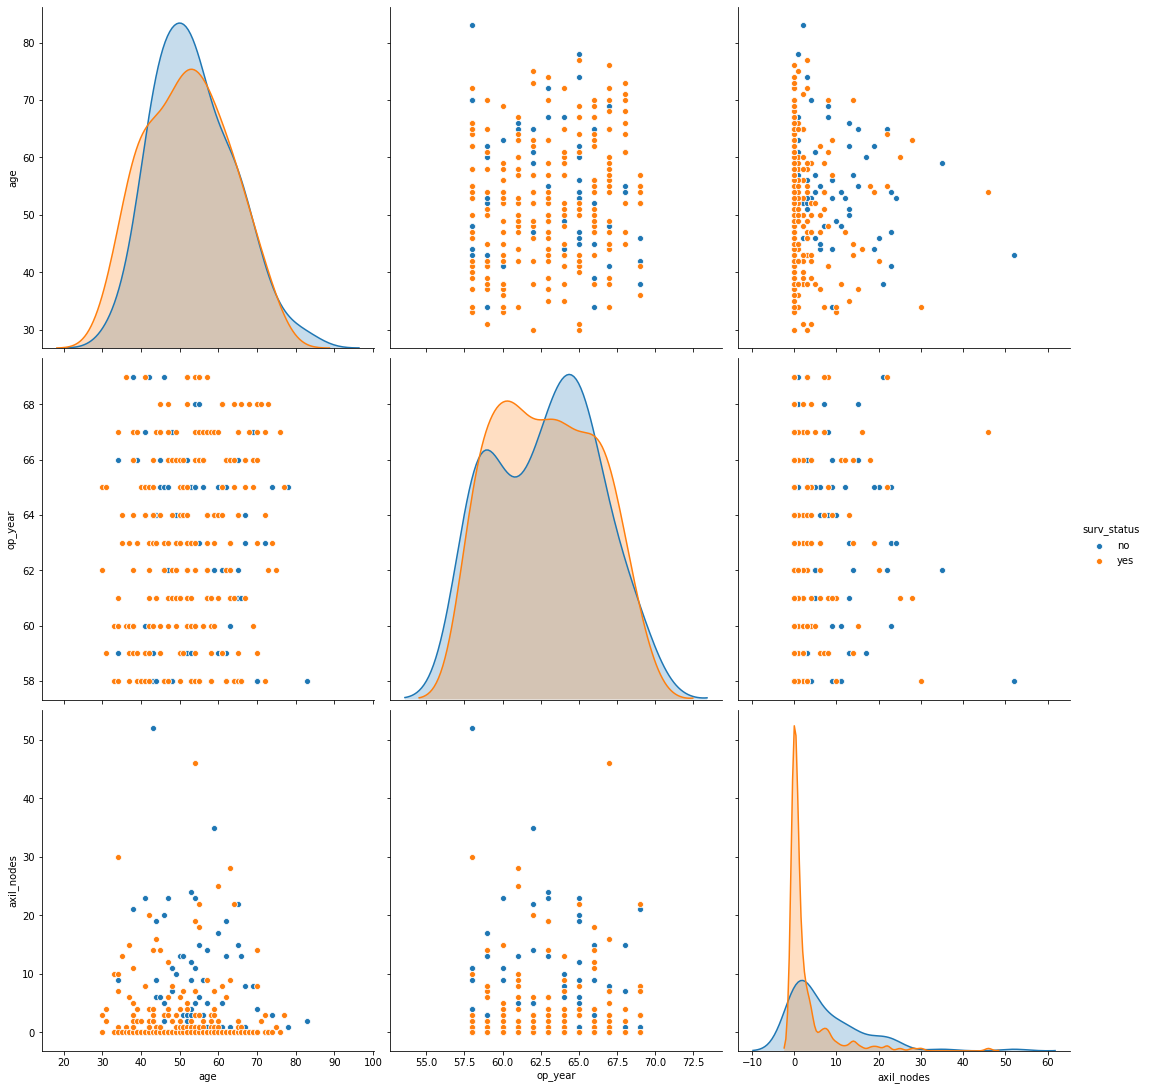

In [31]:
# function for plotting every column
sns.pairplot(df, hue='surv_status', height=5)